In [1]:
import os
import logging
import numpy as np
import tensorflow as tf

import tools.train as train
import tools.plot as plot

Using TensorFlow backend.



Train set
Count of each class
Classes
0.0    72471
1.0     2223
2.0     5788
3.0      641
4.0     6431
dtype: int64

Test set
Count of each class
Classes
0.0    18118
1.0      556
2.0     1448
3.0      162
4.0     1608
dtype: int64


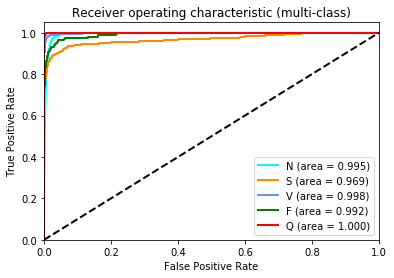

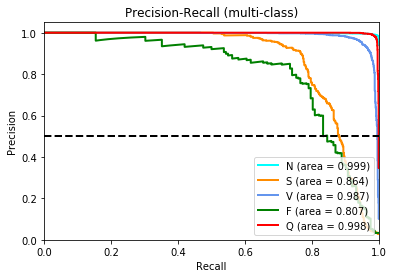

In [2]:
# Suppress tensorflow warnings about internal deprecations
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Count data
files = ("../data/mitbih_train.csv", "../data/mitbih_test.csv")
inputs_mit, labels_mit, sparse_labels_mit, df_mit = train.preprocess(*files, fft=False)
# Add a dimension for "channels"
for key in inputs_mit:
    inputs_mit[key] = tf.expand_dims(inputs_mit[key], axis=2)
train.class_count(df_mit)

# Load in a model
modelpath = os.path.join("..", "models", "20190812-181641", "nofft", "wavenet.h5") # A specific run on Jeffmin's computer
model = tf.keras.models.load_model(modelpath)

test_pred = model.predict(inputs_mit["test"])
plot.plot_roc_curve(test_pred, labels_mit["test"], ["N", "S", "V", "F", "Q"])
plot.plot_pr_curve(test_pred, labels_mit["test"], ["N", "S", "V", "F", "Q"])